# Projekt KNDS

In [1]:
%load_ext autoreload
%autoreload 2

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
            ~~~~~~~~~~~~~~~~~^^^^^^^^^^^
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/codespace/.local/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 340, in dispatch_control
    async with self._control_lock:
               ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
                     ^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-

**Import bibliotek**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import funkcji**

In [3]:
import dataAnalysis as dataAnalysis
import dataProcessing as dataProcessing
import regressionModel as regressionModel
import logisticRegressionModel as logisticRegressionModel
import decisionTreeModel as decisionTreeModel
import randomForest as randomForest

**Import danych**

In [4]:
def getData(filePath):
    dataset = pd.read_csv(filePath)
    return dataset

def printData(data, rows):
    print(data.head(rows))


dataFilePath = '../Resources/Hotel_Reservations.csv'
data = getData(dataFilePath)

**Analiza zbioru**

  1. Analiza podstawowa

In [5]:
dataAnalysis.analyzeData(data)

Analyzing data...
Data Overview:
<class 'pandas.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  str    
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  str    
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  str    
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64 

  2. Rozkłady zmiennych numerycznych

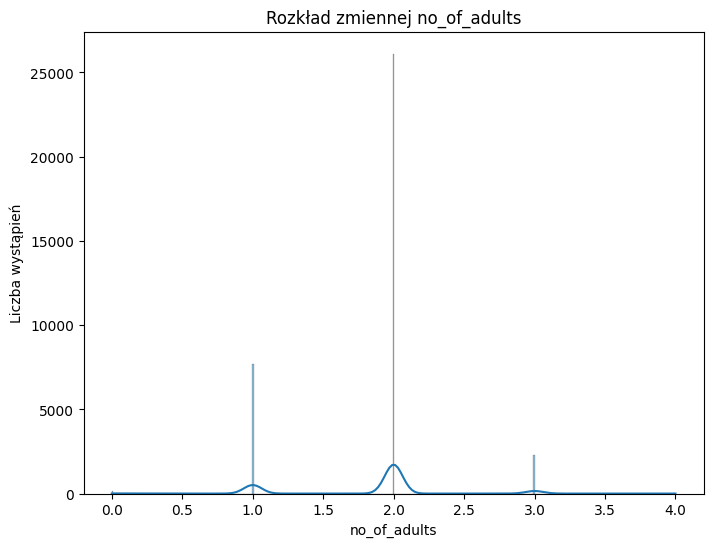

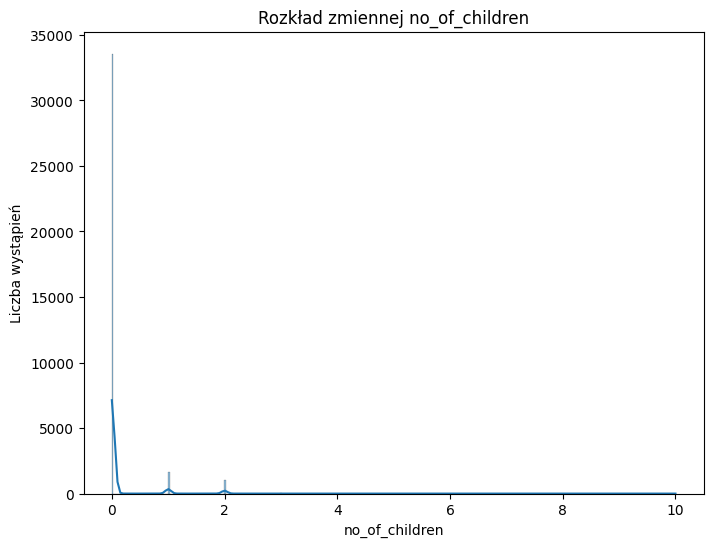

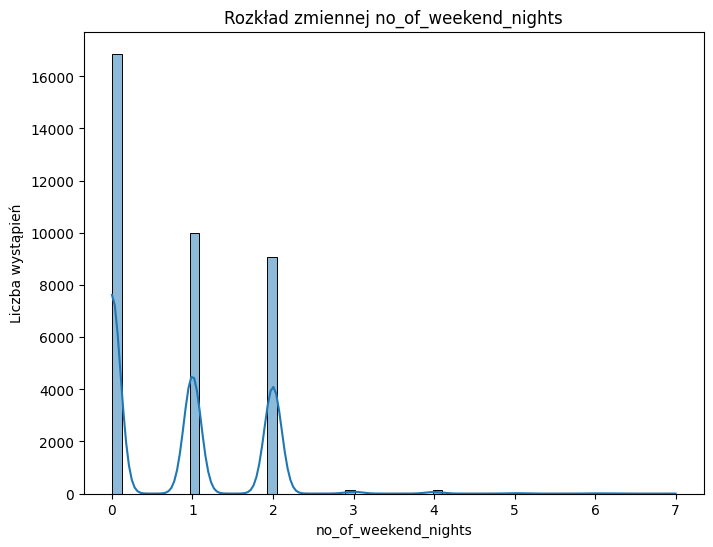

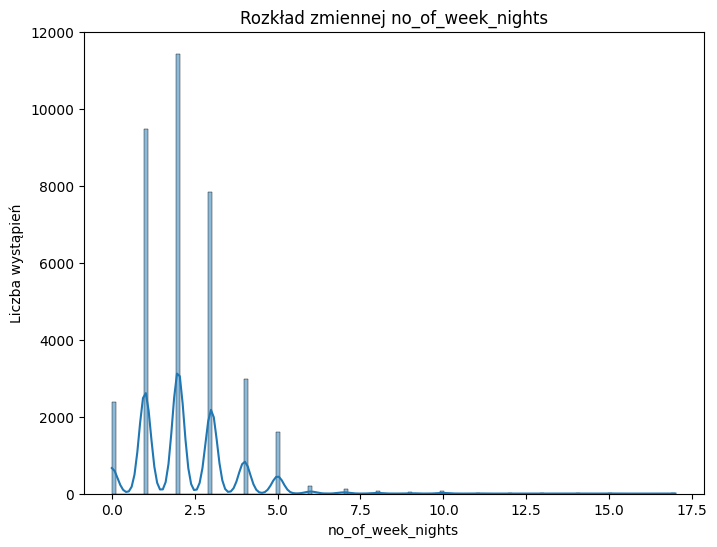

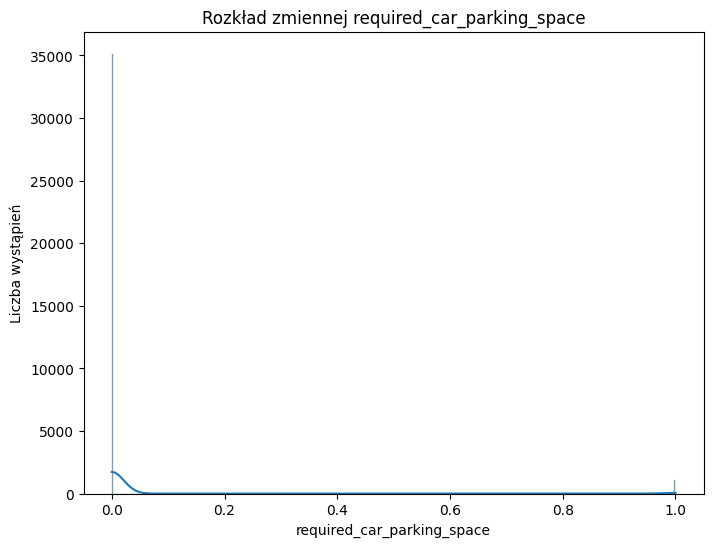

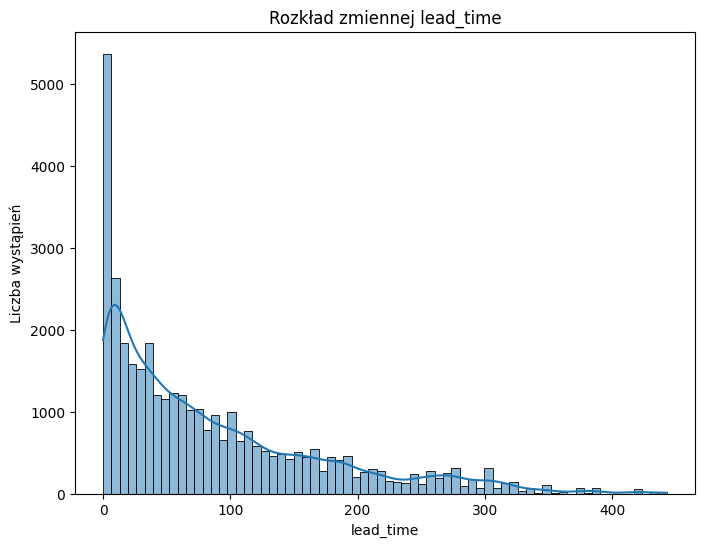

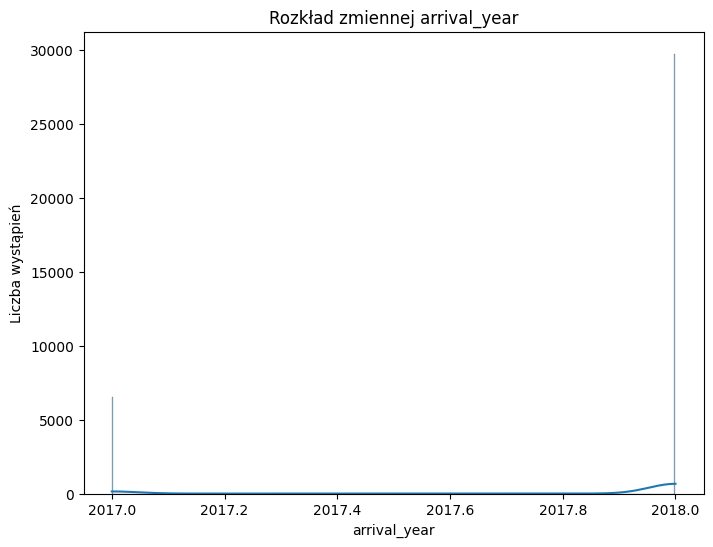

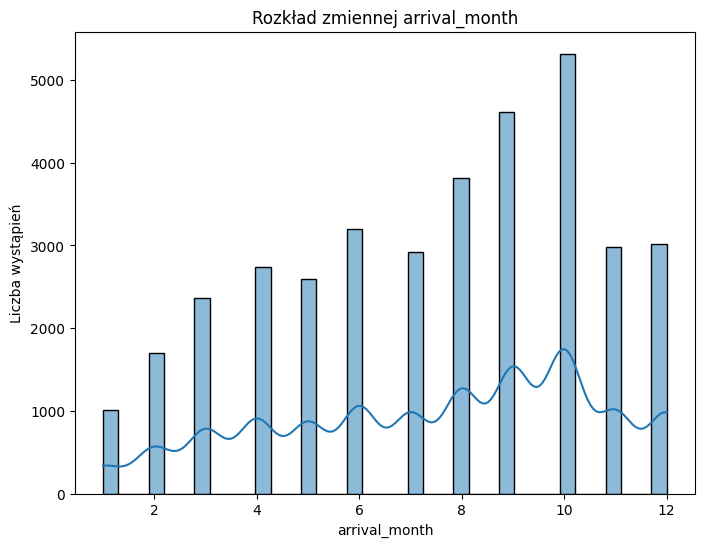

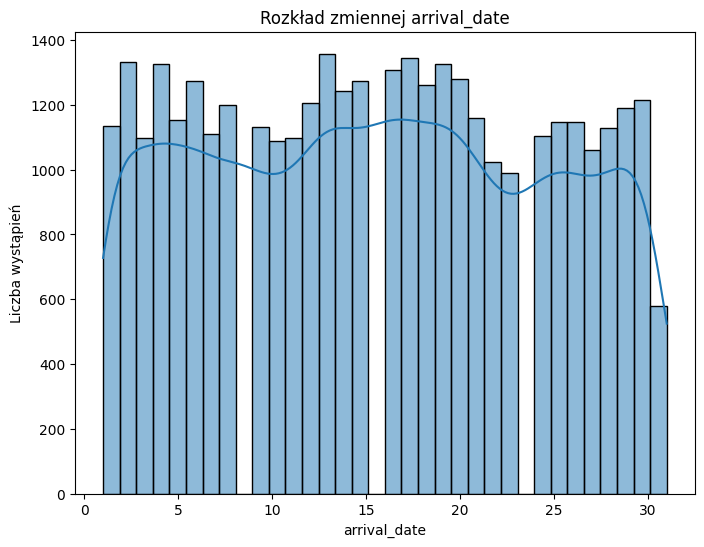

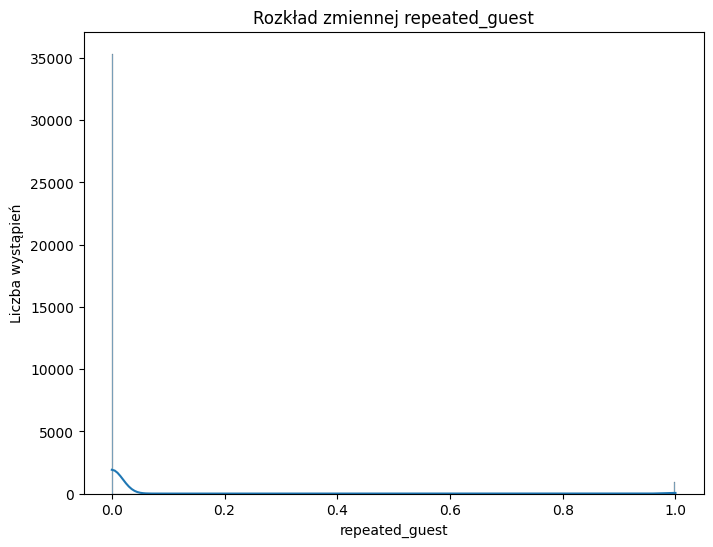

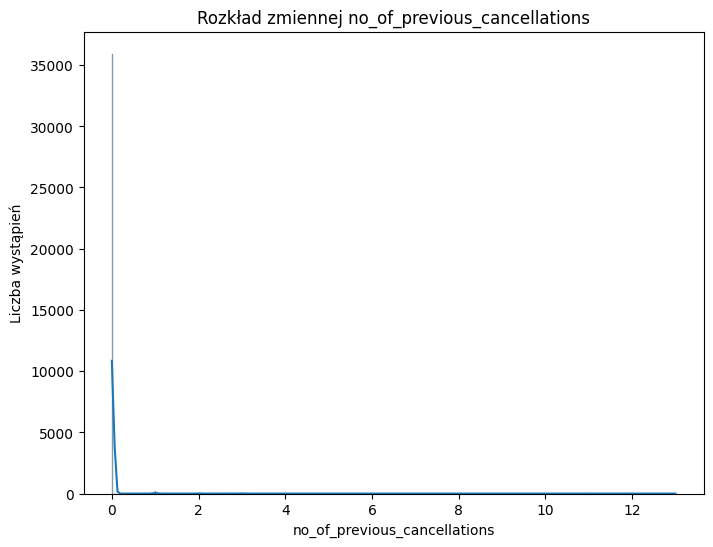

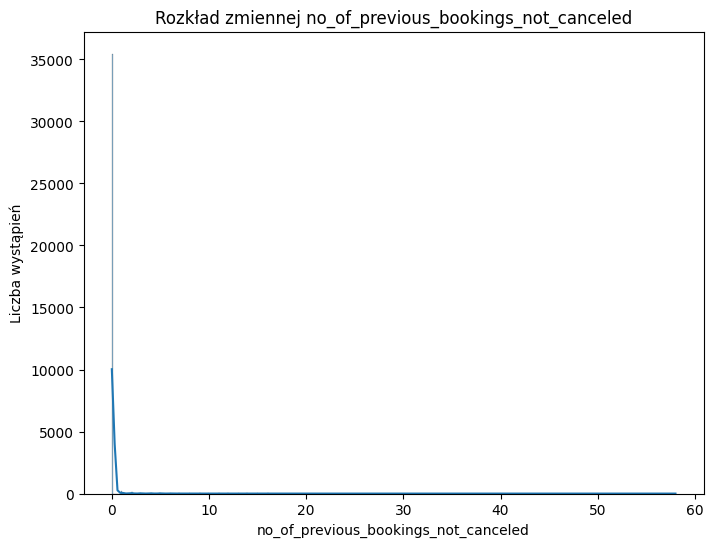

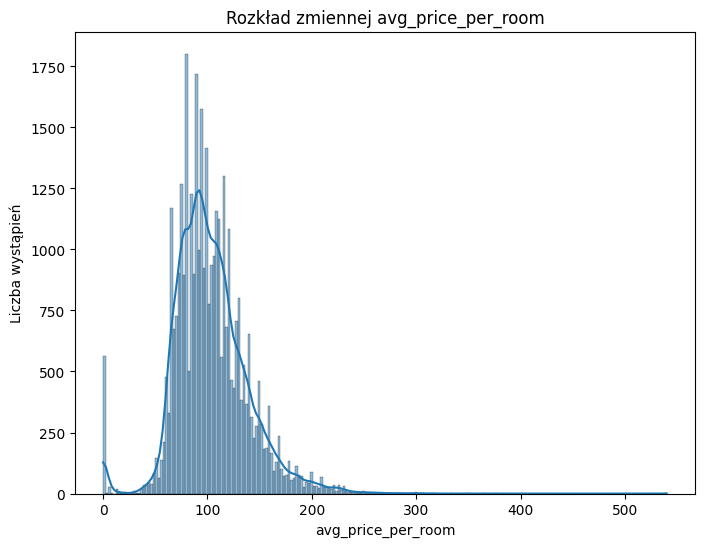

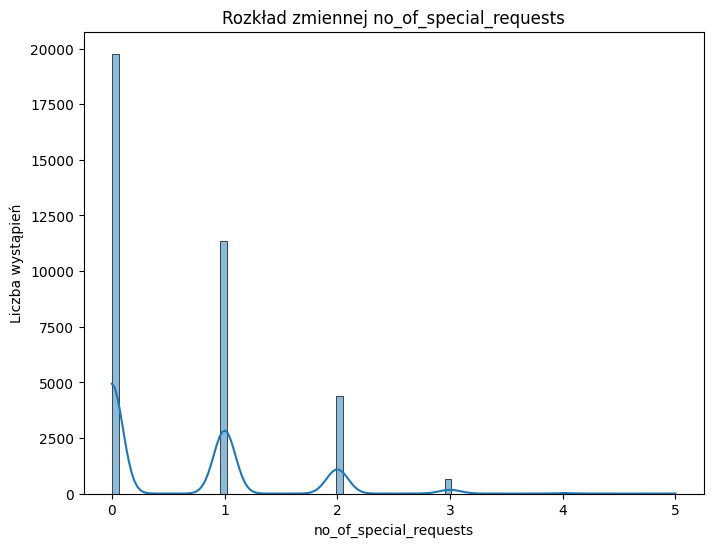

In [6]:
dataAnalysis.plotHist(data)

3. Rozkłady zmiennych kategorycznych

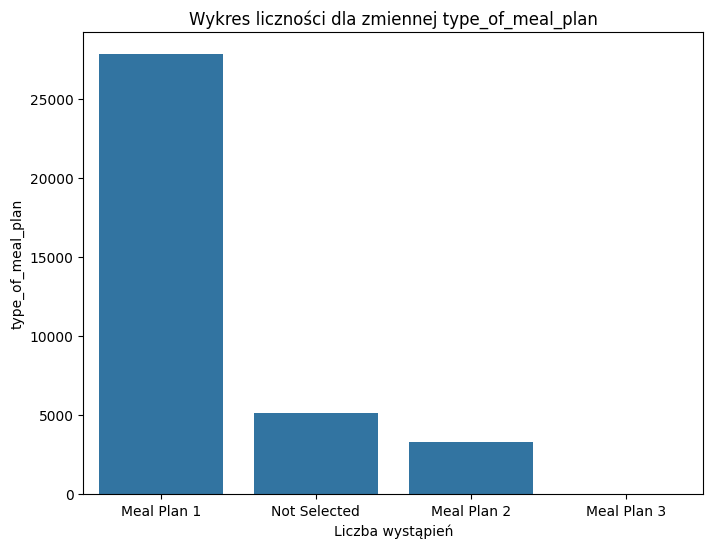

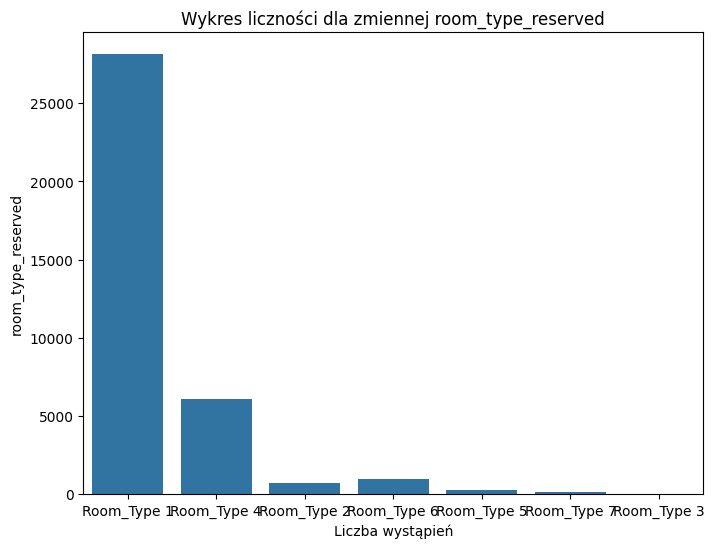

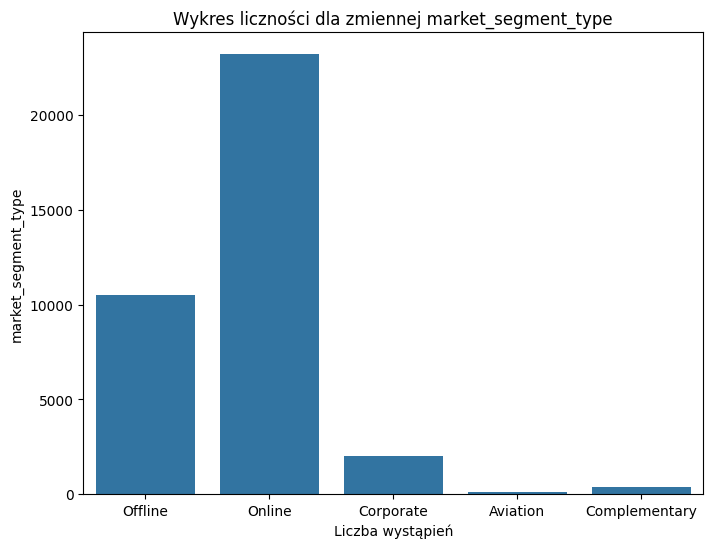

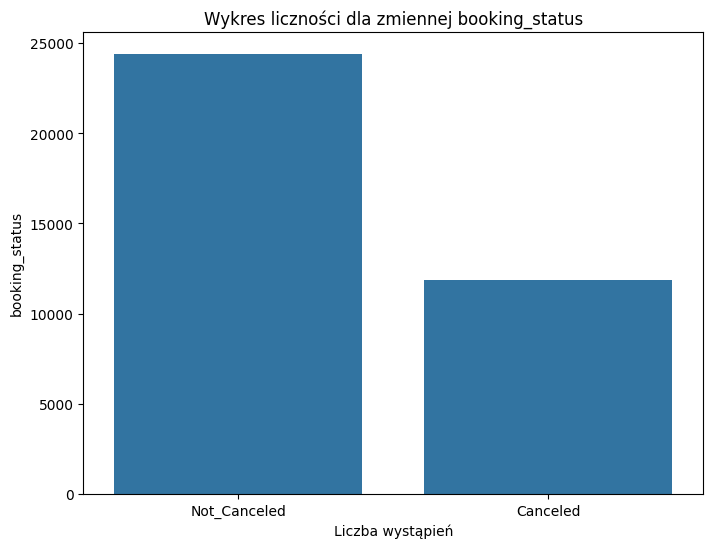

In [7]:
dataAnalysis.plotCounts(data)

  4. Analiza wartości odstających

In [8]:
dataAnalysis.startIQRAnalysis(data)

Number of outliers in no_of_adults:
 10167
Number of outliers in no_of_children:
 2698
Number of outliers in no_of_weekend_nights:
 21
Number of outliers in no_of_week_nights:
 324
Number of outliers in required_car_parking_space:
 1124
Number of outliers in lead_time:
 1331
Number of outliers in arrival_year:
 6514
Number of outliers in arrival_month:
 0
Number of outliers in arrival_date:
 0
Number of outliers in repeated_guest:
 930
Number of outliers in no_of_previous_cancellations:
 338
Number of outliers in no_of_previous_bookings_not_canceled:
 812
Number of outliers in avg_price_per_room:
 1696
Number of outliers in no_of_special_requests:
 761


  5. Wartości odstające - wykresy

  6. Współczynnik korealcji Pearsona

In [9]:
dataAnalysis.correlationCoefficient(data)

['no_of_adults', 'no_of_children', np.float64(-0.019787073557932012)]
['no_of_adults', 'no_of_weekend_nights', np.float64(0.10331577522391469)]
['no_of_adults', 'no_of_week_nights', np.float64(0.10562190100313722)]
['no_of_adults', 'required_car_parking_space', np.float64(0.011428744691347836)]
['no_of_adults', 'lead_time', np.float64(0.09728651035955306)]
['no_of_adults', 'arrival_year', np.float64(0.07671928950617087)]
['no_of_adults', 'arrival_month', np.float64(0.02184147054742398)]
['no_of_adults', 'arrival_date', np.float64(0.026337868434582013)]
['no_of_adults', 'repeated_guest', np.float64(-0.19227693931856912)]
['no_of_adults', 'no_of_previous_cancellations', np.float64(-0.047425747290594275)]
['no_of_adults', 'no_of_previous_bookings_not_canceled', np.float64(-0.11916579302273755)]
['no_of_adults', 'avg_price_per_room', np.float64(0.2968857360658223)]
['no_of_adults', 'no_of_special_requests', np.float64(0.18940095137214608)]
['no_of_children', 'no_of_weekend_nights', np.floa

  7. Korelacja zmiennych - wykresy

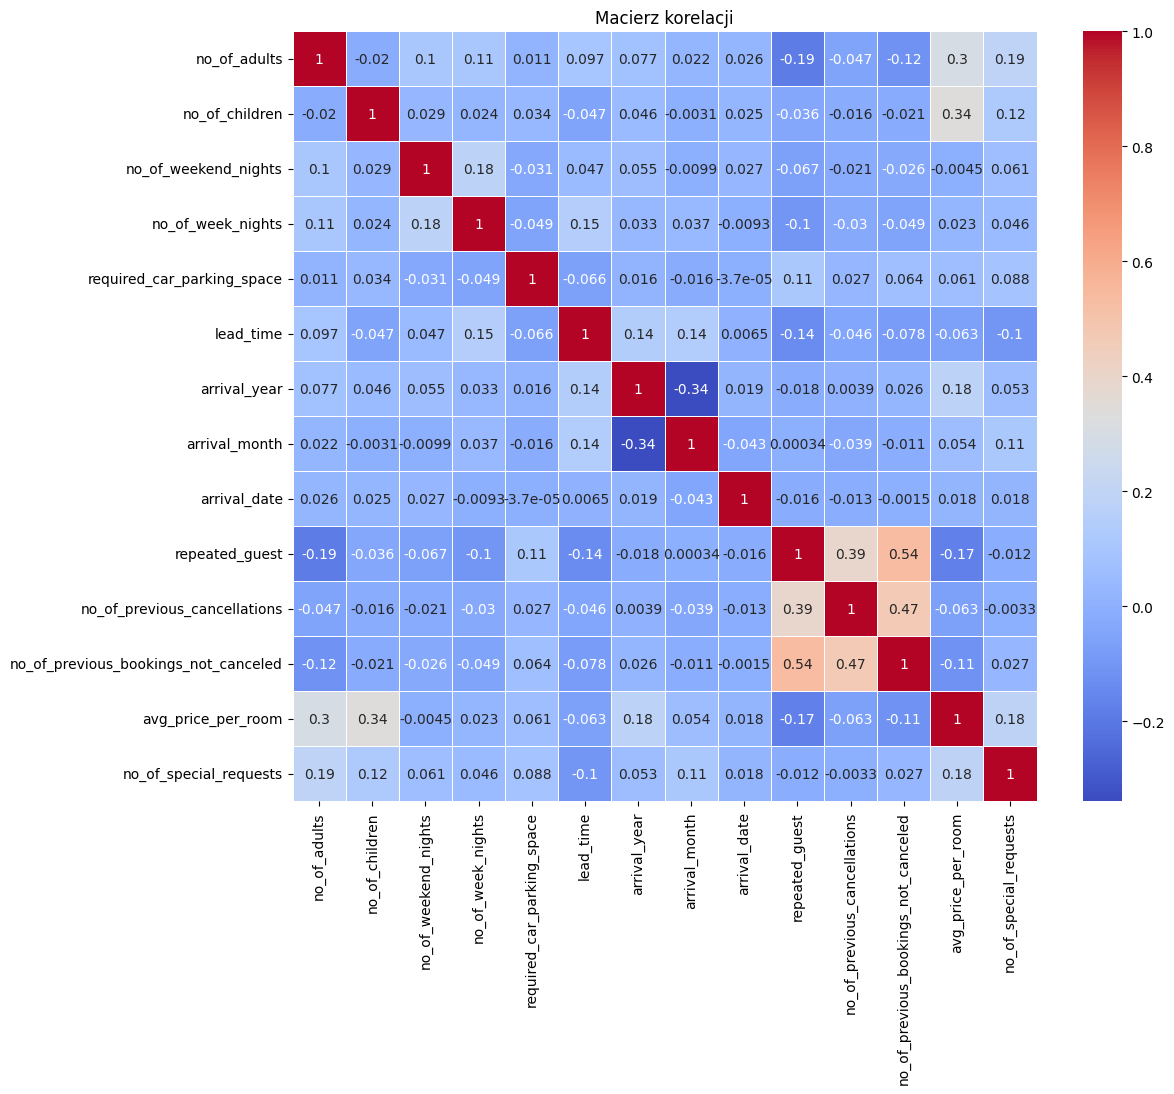

In [10]:
# Do pokazania korealacji miezy zmiennymi najlepsza jest heatmap, bo pokazuje korelacje między wszystkimi zmiennymi jednocześnie.

dataAnalysis.plotHeatmap(data)

  8. Zależności między kolumnami numerycznymi a zmienną celu

Target variable for box plots: booking_status


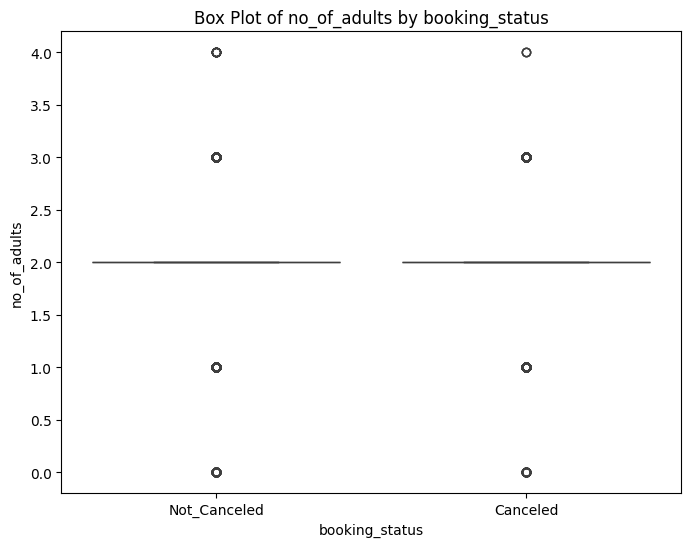

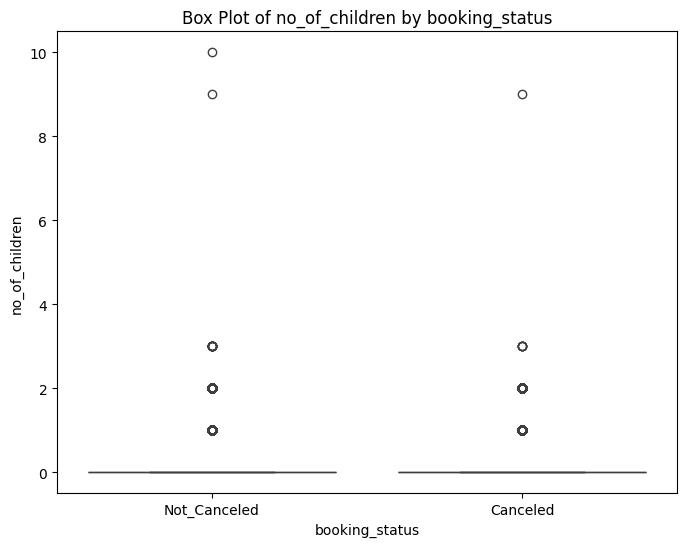

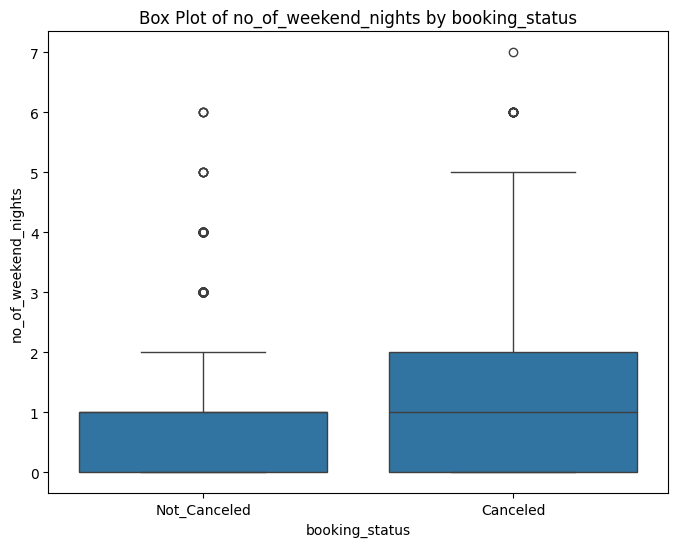

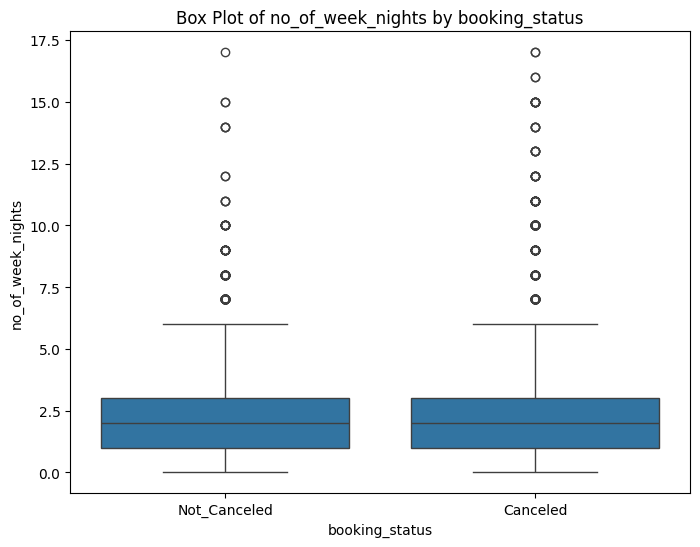

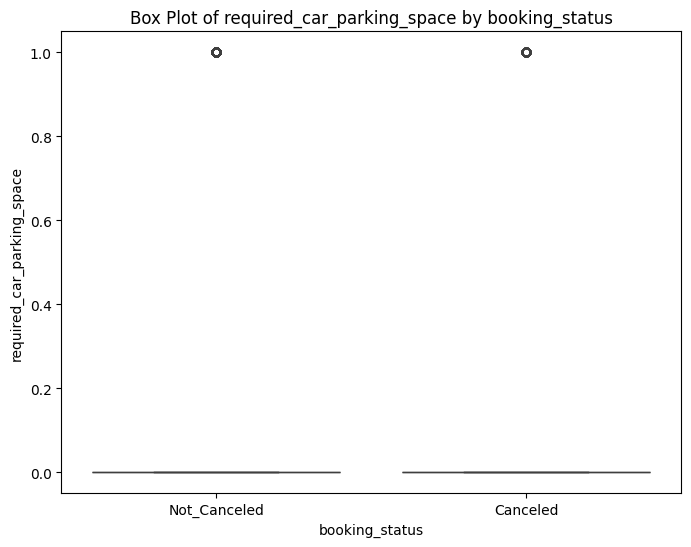

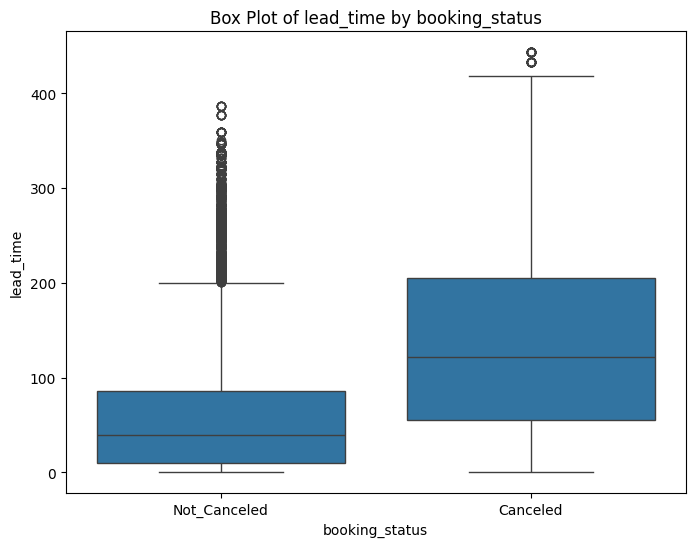

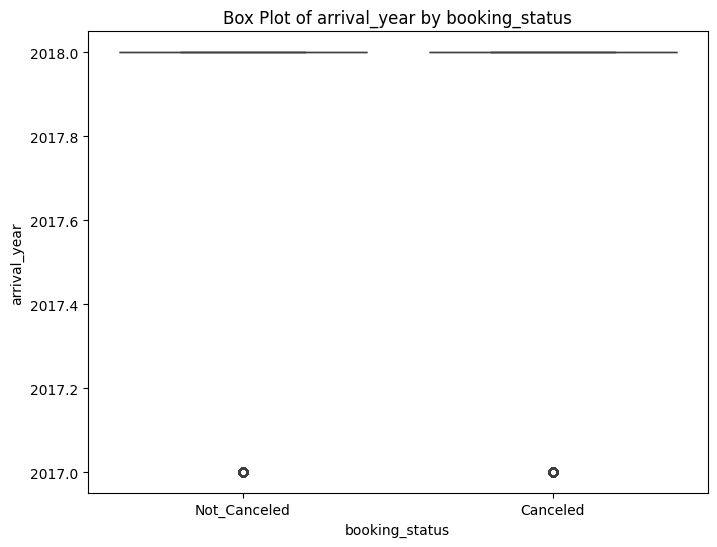

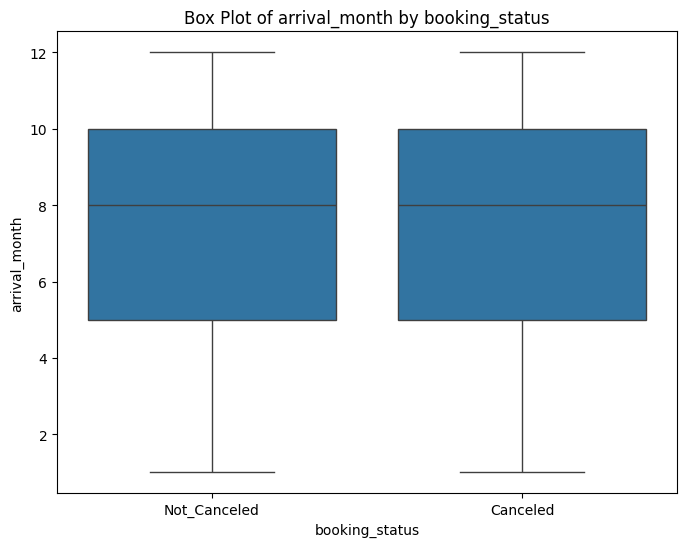

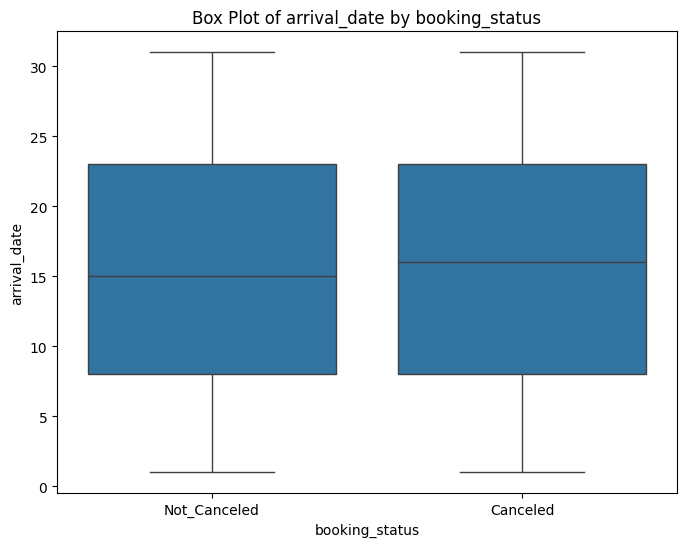

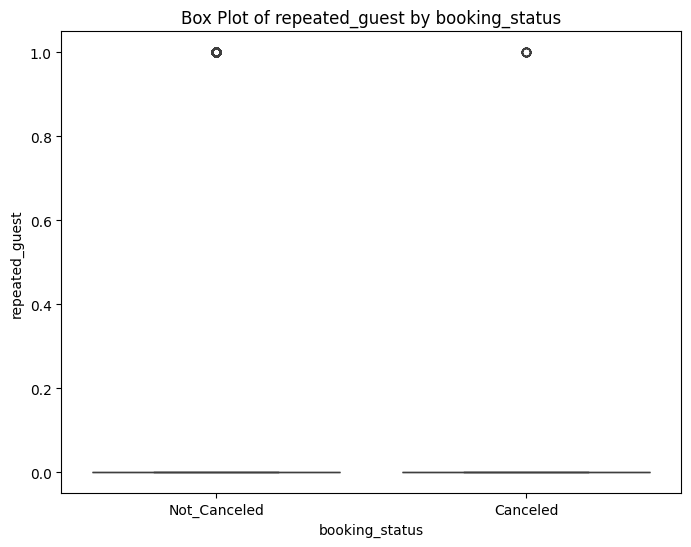

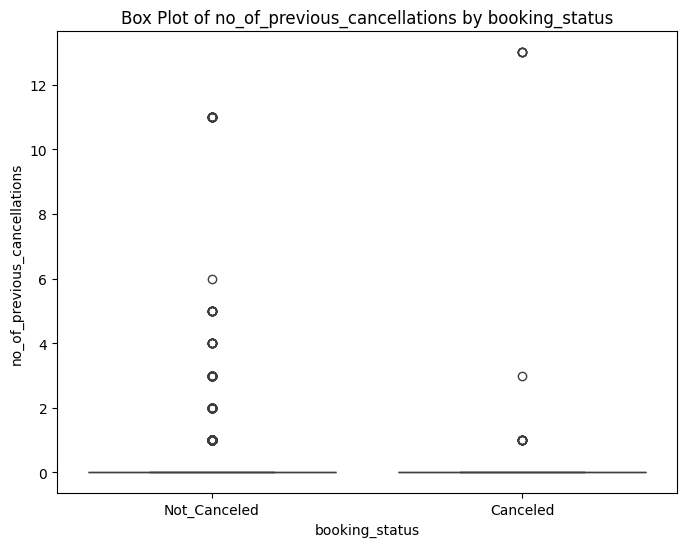

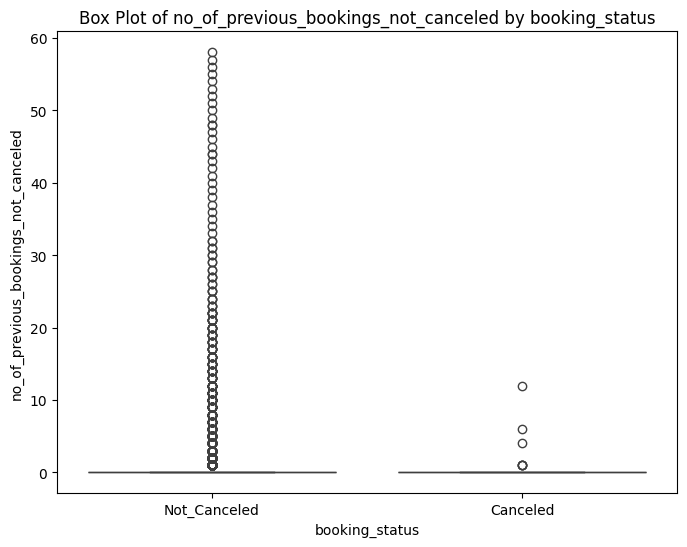

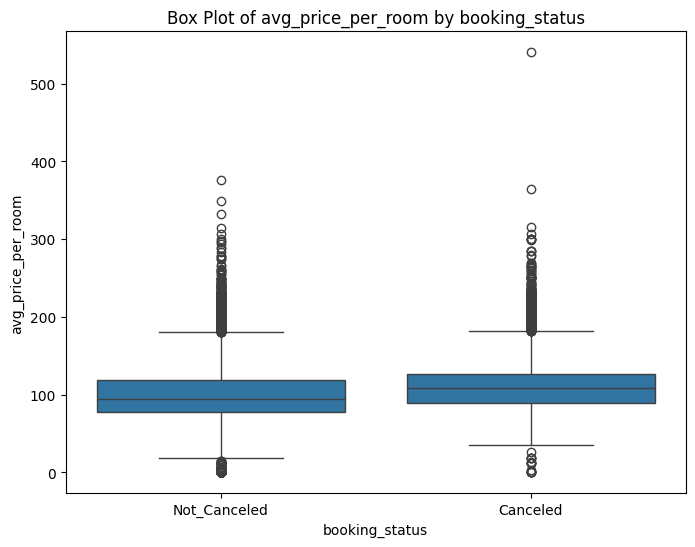

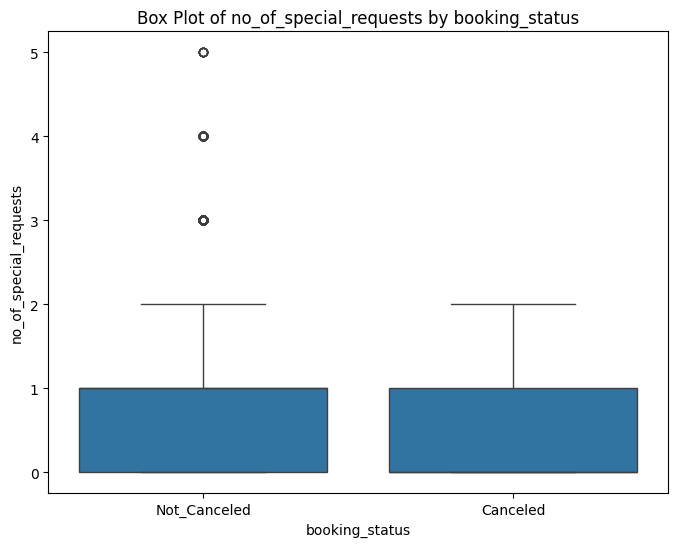

In [11]:
dataAnalysis.plotBoxDiagramsForTargetVar(data)

**Przetworzenie danych i przygotowanie zbiorów**

In [12]:
# Trzeba dropnąć Booking_ID i arrival bo wywali 30k kolumn

data = data.drop(columns=['Booking_ID'])

X_train_processed, X_test_processed, y_train_processed, y_test_processed = dataProcessing.processData(data)


Processing data...
Splitting data...
All feratures:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Numerical features:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
Categorical features:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
Processed training dataset: 
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.302374        2.242799             -

**Trening - Regresja logistyczna i Drzewo decyzyjne**

1. Regresja logistyczna

In [13]:
logistic_regression_model = logisticRegressionModel.logisticRegressionTrain(X_train_processed, X_test_processed, y_train_processed, y_test_processed)
logisticRegressionModel.plot_decision_boundary(X_test_processed, y_test_processed, logistic_regression_model, "Logistic Regression Decision Boundary")

Training Logistic Regression model...
Dataset 1 (Diagonal) - Logistic Regression Accuracy: 0.8062
Coefficients of the Logistic Regression model: [[ 0.03607455  0.06141983  0.12405649  0.05497398 -0.27946683  1.34397646
   0.17218532 -0.11548617  0.01778253 -0.36060723  0.08320715 -0.12663724
   0.6473168  -1.16257475 -0.51167181 -0.32913362  0.23163005 -0.27810532
   0.48366209  0.00174444  0.08877327  0.22802164 -0.28246552 -0.49046055
  -0.91655606  0.79467784 -1.63036448 -0.01169741 -0.91000196  0.87010531]]
Intercept of the Logistic Regression model: [-1.37463937]


InvalidIndexError: (slice(None, None, None), 0)

2. Drzwo decyzyjne

In [ ]:
decsion_tree_model = decisionTreeModel.decisionTreeTrain(X_train_processed, X_test_processed, y_train_processed, y_test_processed)
decisionTreeModel.plot_decision_boundary(X_test_processed, y_test_processed, decsion_tree_model, "Decision Tree Decision Boundary")

Training Decision Tree model...
Dataset 1 (Diagonal) - Decision Tree Accuracy: 0.8753


InvalidIndexError: (slice(None, None, None), 0)

Random Forest

inicializing RandomForestClassifier
Training...
Accuracy of the model:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4955
           1       0.87      0.80      0.84      2300

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255



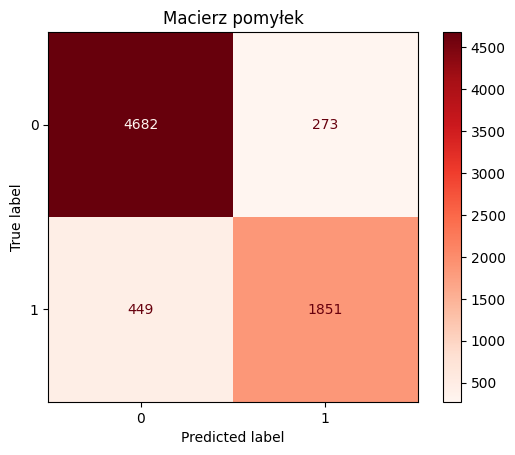

[np.False_, np.False_, np.True_, np.True_, np.True_, np.True_, np.False_, np.True_, np.True_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_]


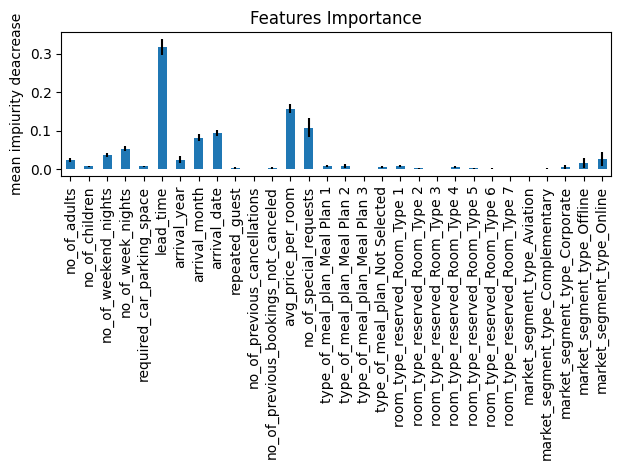

In [ ]:
rf = randomForest.randomForestTraining(X_train_processed,y_train_processed)
randomForest.modelBenchmark(rf,X_test_processed,y_test_processed)
randomForest.confiusionMatrix(rf,X_test_processed,y_test_processed)
cv = randomForest.FeaturesImportance(rf,X_train_processed)

Deleting unstable features and 

In [ ]:
X_copy = X_train_processed.loc[:,cv]
y_copy = y_train_processed
print(len(X_copy.columns))
print(len(X_train_processed.columns))


7
30
